In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

projem için gerekli olan kütüphaneleri ekledim.

In [59]:
path = 'C:/Users/tepec/Desktop/proje2/dataset/training_set/'

projedeki verileri göstermek amacıyla projemin dosya yolunu path adındaki değişkene atıyorum.

In [60]:
categories = ['cats', 'dogs', 'horses']

projedeki veri setlerini kategoriler olarak değişkene atıyorum.

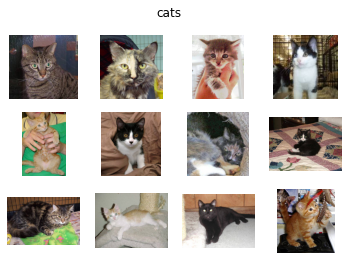

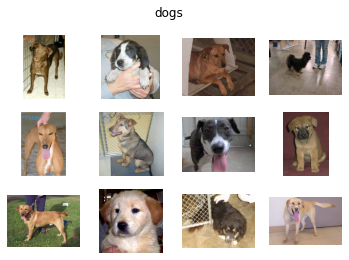

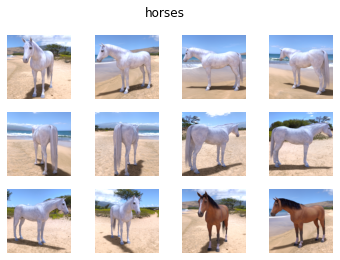

In [61]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v,"rb")
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

projedeki veri setlerimi görüyorsunuz.

In [62]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/tepec/Desktop/proje2/dataset/training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )

Found 8500 images belonging to 3 classes.


verisetimdeki görüntüleri 64*64 olacak şekilde belirliyorum ve imagedatagenerator kullanarak görüntüleri algoritmaya tek tek gönderiyorum.

In [63]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/tepec/Desktop/proje2/dataset/test_set',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )

Found 2128 images belonging to 3 classes.


burada aynı işlemi test verileri içinde yapıyorum. class mode parametresini 3. bir class eklediğim için binary'den categorical olarak değiştiriyorum

In [64]:
cnn = tf.keras.models.Sequential()

burada cnn adlı değişkenime keras kullanarak modelimi tanımlıyorum

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

modelimin ilk konvolüsyon katmanını ekliyorum activasyon fonksiyonu olarak en cok verim aldığım ve en hızlı çalışan relu fonksiyonunu kullanıyorum inputshape parametresinde ise görüntülerim gürültülü veriler olduğu için 64,64,3 olarak belirliyorum.

In [66]:
cnn.add(BatchNormalization())

her konvolüsyon katmanından sonra batchnormalization kullanarak daha verimli bir öğrenme amaçlanmakta.

In [67]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

pooling katmanını ekliyoruz ve maxpooling kullanıyorum.

In [68]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

2. konvolüsyon katmanı

In [69]:
cnn.add(BatchNormalization())

2. batchnormalization

In [70]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

3. konvolüsyon katmanı

In [71]:
cnn.add(BatchNormalization())

In [72]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [73]:
cnn.add(tf.keras.layers.Flatten())

modelimizin flatten katmanını ekliyorum.

In [74]:
cnn.add(tf.keras.layers.Dense(128, activation='relu'))

görüntülerimi 64*64 olarak belirlediğim için units parametresini 128 olarak veriyorum.

In [75]:
cnn.add(tf.keras.layers.Dense(3, activation='softmax'))

verilerim 3 adet kategoriden oluştuğu için 3 parametresini kullanıyorum.

In [76]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelimi compile ediyorum loss değerini binary crossentropy den categorical crossentropy ye çeviriyorum optimizer olarak adam metrics olarakda accuracy kullanıldı.

In [77]:
hist = cnn.fit(x = training_set, validation_data = test_set, epochs = 45, shuffle = True)

Epoch 1/45
266/266 [==============================] - 83s 313ms/step - loss: 0.7869 - accuracy: 0.6366 - val_loss: 0.9296 - val_accuracy: 0.6048
Epoch 2/45
266/266 [==============================] - 90s 337ms/step - loss: 0.5874 - accuracy: 0.7025 - val_loss: 1.0990 - val_accuracy: 0.6725
Epoch 3/45
266/266 [==============================] - 86s 323ms/step - loss: 0.5475 - accuracy: 0.7259 - val_loss: 1.0754 - val_accuracy: 0.5747
Epoch 4/45
266/266 [==============================] - 77s 291ms/step - loss: 0.5121 - accuracy: 0.7560 - val_loss: 1.4531 - val_accuracy: 0.6241
Epoch 5/45
266/266 [==============================] - 75s 283ms/step - loss: 0.4762 - accuracy: 0.7720 - val_loss: 1.4094 - val_accuracy: 0.7039
Epoch 6/45
266/266 [==============================] - 87s 326ms/step - loss: 0.4571 - accuracy: 0.7876 - val_loss: 1.2385 - val_accuracy: 0.6988
Epoch 7/45
266/266 [==============================] - 83s 310ms/step - loss: 0.4241 - accuracy: 0.8026 - val_loss: 1.2721 - val_ac

modelimin öğrenmesini başlatıyorum ve denemeler yapmak için bunu bir değişkene atıyorum epoch değerini denemelerim sonucu daha iyi accuary değeri aldığımdan için 45 olarak belirledim. shuffle true olarak kullanmamın amacı algoritmamın bir yerden sonra ezberlemeye yönelmesi olmaması için her seferinde veri setimdeki görüntülerin sırarını değiştiriyorum.

In [78]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


anahtar kelimelerimiz

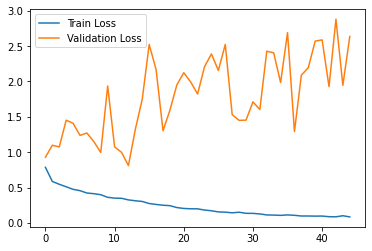

In [79]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

grafikler ile loss değerlerimiz

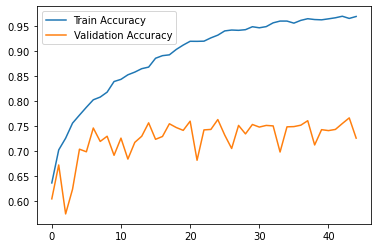

In [80]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

grafikler ile öğrenme değerlerimiz

algoritmamızı test etmek için denem fotoğragları vererek tahmin edilmesini sağlıyoruz

In [282]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
def load_predict():
    
    classes = {
        0: "cat",
        1: "dog",
        2: "horse",
    }
    
    img = image.load_img('C:/Users/tepec/Desktop/proje2/dataset/single_prediction/dog1.jpg', target_size=(64,64))
    plt.imshow(img)
    img = tf.expand_dims(img, axis = 0)
    probs = cnn.predict(img).flatten()
    index = np.argmax(probs)
    prob = probs[index]
    pred = classes[index]
    
    return pred, prob

('dog', 1.0)

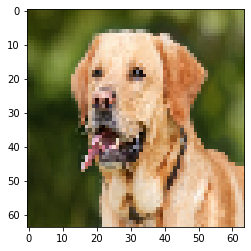

In [283]:
load_predict()